In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
X= data.data
y=data.target

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=lr.predict(X_test)

In [13]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5188113124539246
48.727137609532534


In [18]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.001)

In [19]:
r.fit(X_train,y_train)

Ridge(alpha=0.001)

In [20]:
y_pred1=r.predict(X_test)

In [21]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred1))
print(np.sqrt(mean_squared_error(y_test,y_pred1)))

0.5201448351821767
48.659571778592515


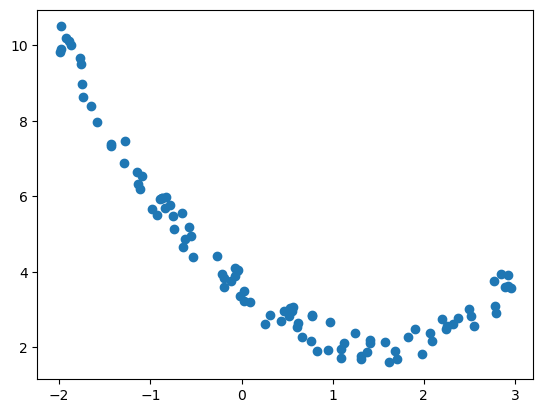

In [22]:
m=100
x1=5*np.random.rand(m,1)-2
x2=0.7*x1**2-2*x1+3+np.random.rand(m,1)
plt.scatter(x1,x2)
plt.show()

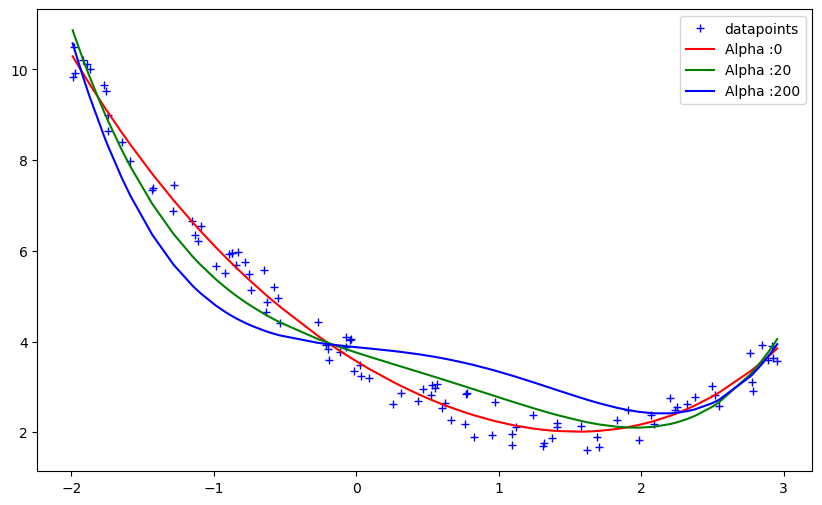

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def ridge(x1,x2,alpha):
    model=Pipeline([
        ('poly_feats',PolynomialFeatures(degree=4)),
        ('ridge',Ridge(alpha=alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)
alphas=[0,20,200]
cs=['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='datapoints')

for alphas,c in zip(alphas,cs):
    preds=ridge(x1,x2,alphas)
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha :{}'.format(alphas))
plt.legend()
plt.show()

